<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment7/Transformer_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-transformer

  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12305 sha256=195cfd6cb765822c63c394276107330da07b011836dc40022419a5c96a7ddb1f
  Stored in directory: /root/.cache/pip/wheels/46/68/26/692ed21edd832833c3b0a0e21615bcacd99ca458b3f9ed571f
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3960 sha256=bc86cfd899a2cb32c23ed135c3b068f150d74e70c23667fb653b2e1aa4786de5
  Stored in directory: /root/.cache/pip/wheels/81/67/b5/d847588d075895281e1cf5590f819bd4cf076a554872268bd5
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4668 sha256=edce8ace3b43f291219dab98fbe412c964fb29f0e63f435674b5d90f00c85d28
  Stored in directory: /root/.cache/pip/wheels/85/5d/1c/2e619f594f69fbcf8bc20943b27d414871c409be053994813e
  Created wheel for keras-multi-head: filename=keras_multi_head-0.29.0-py3-none-any.whl size=14993 sha256=d5e3516587848af9df0b6bfd3fcb7b9e832ec67c8df1

In [3]:
import numpy as np
from keras_transformer import get_model
import tensorflow as tf

# Build a small toy token dictionary
tokens = 'all work and no play makes jack a dull boy'.split(' ')
token_dict = {
    '<PAD>': 0,
    '<START>': 1,
    '<END>': 2,
}
for token in tokens:
    if token not in token_dict:
        token_dict[token] = len(token_dict)

# Generate toy data
encoder_inputs_no_padding = []
encoder_inputs, decoder_inputs, decoder_outputs = [], [], []
for i in range(1, len(tokens) - 1):
    encode_tokens, decode_tokens = tokens[:i], tokens[i:]
    encode_tokens = ['<START>'] + encode_tokens + ['<END>'] + ['<PAD>'] * (len(tokens) - len(encode_tokens))
    output_tokens = decode_tokens + ['<END>', '<PAD>'] + ['<PAD>'] * (len(tokens) - len(decode_tokens))
    decode_tokens = ['<START>'] + decode_tokens + ['<END>'] + ['<PAD>'] * (len(tokens) - len(decode_tokens))
    encode_tokens = list(map(lambda x: token_dict[x], encode_tokens))
    decode_tokens = list(map(lambda x: token_dict[x], decode_tokens))
    output_tokens = list(map(lambda x: [token_dict[x]], output_tokens))
    encoder_inputs_no_padding.append(encode_tokens[:i + 2])
    encoder_inputs.append(encode_tokens)
    decoder_inputs.append(decode_tokens)
    decoder_outputs.append(output_tokens)

In [4]:
# Build the model
model = get_model(
    token_num=len(token_dict),
    embed_dim=30,
    encoder_num=3,
    decoder_num=2,
    head_num=3,
    hidden_dim=120,
    attention_activation='relu',
    feed_forward_activation='relu',
    dropout_rate=0.05,
    embed_weights=np.random.random((13, 30)),
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
)

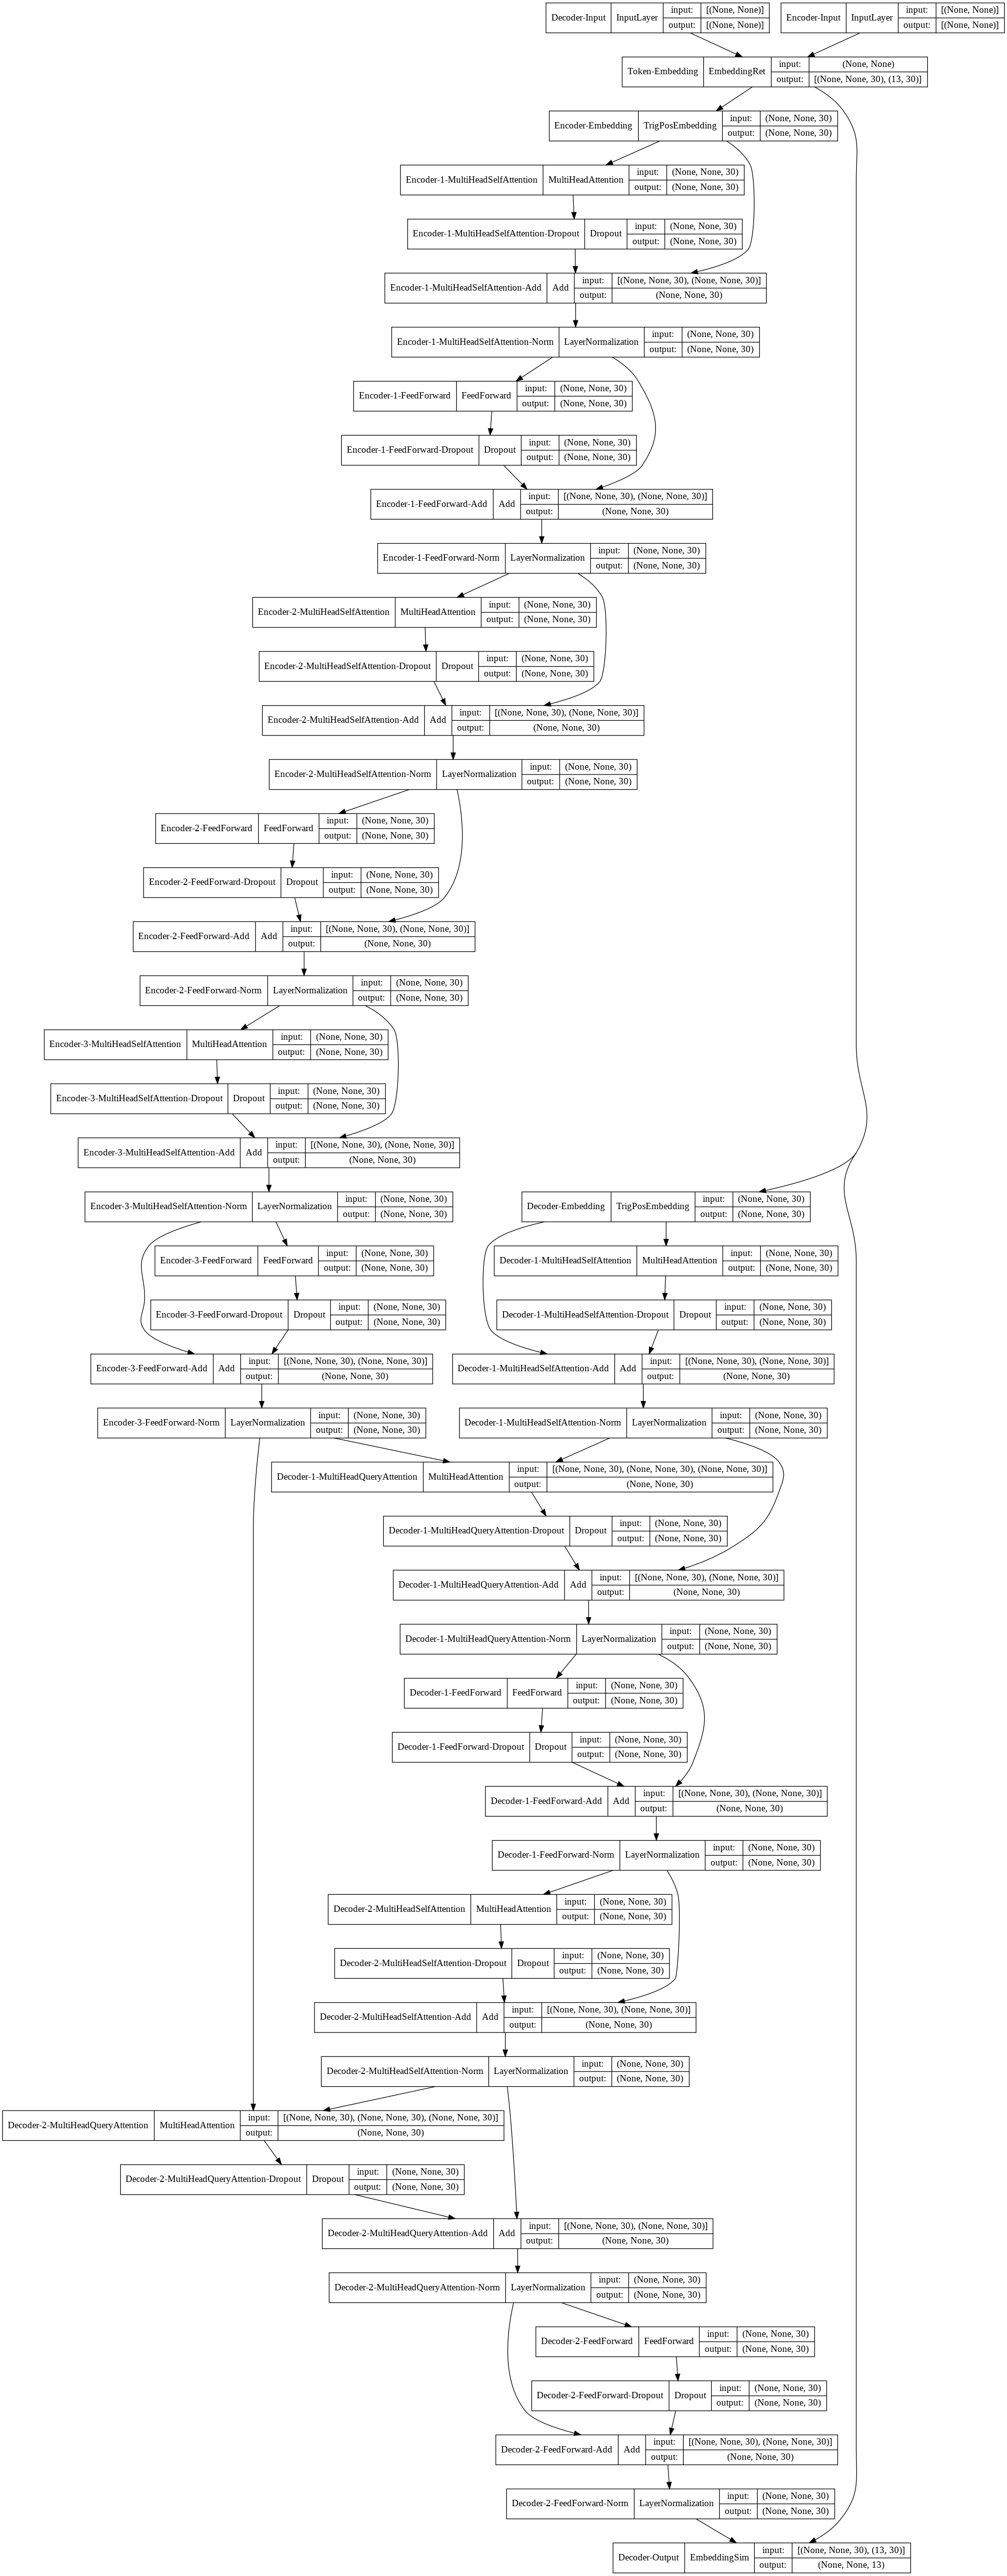

In [5]:
tf.keras.utils.plot_model(  model,
    to_file='model.png', dpi=96,               
    show_shapes=True, show_layer_names=True, 
    expand_nested=True                       
)